# Task 4.10 - Part 1

## List of contents:

### 1 - Import libraries and data set
### 2 - Security implications - Address any remanining PII
### 3 - Create a regional segmentation of the data
### 4 - Create an exclusion flag for low-activity customers
### 5 - Data Exploration - Profiling Instacarts' Customers
### 6 - Create customers profiles
### 7 - Aggregate values on a customer-profile level for usage frequency and expenditure
### 8 - Compare customer profiles with regions and departments
### 9 - Produce suitable charts to illustrate the results and export
### 10 - Tidy up the script, export the final data set, and save the notebook


#### ---------------------------------------------------------------------------------------------------------------------------------------------------


## 1. Import libraries and data set

## 1.1. Import libraries

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\01-2024 Instacart Basket Analysis'

## 1.2. Import the most up-to-date merged data set

In [ ]:
# Importing data set

df_all_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [ ]:
# Set the option to display an unlimited number of columns

pd.set_option('display.max_columns', None)

# Set the option to display an unlimited number of rows
pd.set_option('display.max_rows', None)

In [ ]:
# Check shape

df_all_merged.shape

## 2. Security implications - address any remanining PII data in the data before continuing analysis.

In [ ]:
# Remove current 'first_name' and 'last_name' columns from the dataframe due to PII.

df_all_merged = df_all_merged.drop(columns = ['first_name', 'last_name']) 

In [ ]:
# Check current shape

df_all_merged.shape

In [ ]:
# Check current head

df_all_merged.head()

## 3.  Create a regional segmentation of the data 
##      Comparing customer behavior in different geographic areas

## 3.1. Create a 'region' column

In [ ]:
# 1st, Define blocks of states for each region

northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']
midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
south = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']

# 2nd, Create a dictionary that maps each state to its region

state_to_region = {state: 'Northeast' for state in northeast}
state_to_region.update({state: 'Midwest' for state in midwest})
state_to_region.update({state: 'South' for state in south})
state_to_region.update({state: 'West' for state in west})

In [ ]:
# 3rd, Create the column 'region' using the dictionary from previous command

df_all_merged['region'] = df_all_merged['state'].map(state_to_region)

In [ ]:
# Check shape

df_all_merged.shape

In [ ]:
# Check head

df_all_merged.head()

In [ ]:
# check the counts

df_all_merged['region'].value_counts()

In [ ]:
df_all_merged['region'].describe()

In [ ]:
df_all_merged.columns

In [ ]:
# Define the new order of the columns

new_order = ['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'price_average', 'spending_flag',
       'days_since_prior_order_median', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'region', 'age', 'number_of_dependants',
       'family_status', 'income']


# Reorder the columns

df_all_merged = df_all_merged[new_order]

## 3.2. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [ ]:
# Crosstab between 'spending_flag' and 'region'

crosstab = pd.crosstab(df_all_merged['region'], df_all_merged['spending_flag'])

In [ ]:
crosstab

In [ ]:
# Copy  crosstab into the clipboard for transfer into Excel

crosstab.to_clipboard()

In [ ]:
# Crosstab with row-wise proportions %

crosstab_row_prop = pd.crosstab(df_all_merged['region'], df_all_merged['spending_flag'], normalize='index')

In [ ]:
crosstab_row_prop.to_clipboard()

In [ ]:
# Print result of crosstab by ratio %

crosstab_row_prop

In [ ]:
# Export the crosstab to Excel

crosstab.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'crosstab_spending_region.xlsx')) 

In [ ]:
# Export the Crosstab with proportions % to Excel

crosstab_row_prop.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'crosstab_porcentage_spending_region.xlsx')) 

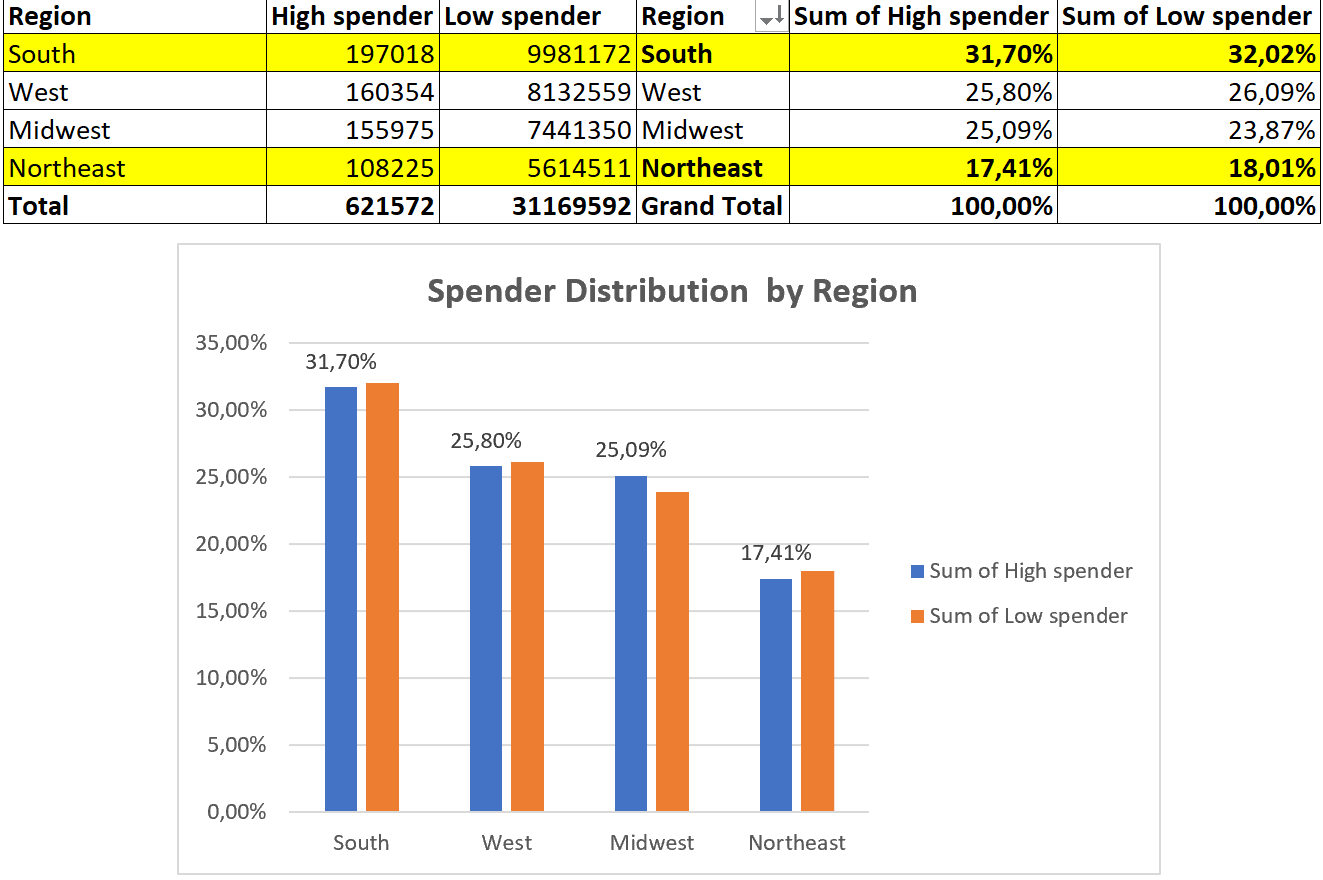

#### Looking at the crossed data we have following key points:

 'South'  makes up the greatest percentages on 'High spender' flag as well as on 'Low spender' flag. While Northeast region is placing at last on both High- and Low spender flag as well.

 Midwest and West regions are reaching average values and both spending flags.

 Overall, the majority of Instacart's consumers are categorized under the 'Low spender' flag. 


## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [ ]:
# Check shape

df_all_merged.shape

## 4.1. Create a 'low_activity' exclusion flag

In [ ]:
# Create a exclusion flag using the 'max_order' column

# create the low activity flag

df_all_merged.loc[df_all_merged['max_order'] <5, 'activity'] = 'low-activity customer'

In [ ]:
# Check the sum of the 'low_activity customer' flag

df_all_merged['activity'].value_counts() 

#### There are 1,440,295 customers categorized by 'low_activity'

## 4.2. Exclude the low-activity customers from the data set

In [ ]:
# create a new data frame that exclude low-activity customers.

df_all_most_active = df_all_merged[df_all_merged['activity'] != 'low-activity customer']

In [ ]:
# Check new shape 

df_all_most_active.shape

In [ ]:
df_all_most_active.head()

In [ ]:
# exclude the 'activity' column, since it is needed anymore

df_all_most_active = df_all_most_active.drop(columns=['activity'], axis=1)

In [ ]:
df_all_most_active.info()

## 4.3. Export new filtered data set

In [ ]:
# Exporting data set excluding 'low_activity_customers' 

df_all_most_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_instacart.pkl'))

## 5. -  Data Exploration
##     -  Profiling Instacarts' Customers

## Import libraries and data set

In [ ]:
# I restart the script from here, to address memory's issues 
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\01-2024 Instacart Basket Analysis'

In [ ]:
# Importing data set

df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_instacart.pkl'))

In [ ]:
# Check shape

df_instacart.shape

In [ ]:
# Set the option to display an unlimited number of columns

pd.set_option('display.max_columns', None)

# Set the option to display an unlimited number of rows
pd.set_option('display.max_rows', None)

In [ ]:
# Check head

df_instacart.head()

## 5.1. Age-Group customers categorization

In [ ]:
# Check descriptive statistics 

df_instacart['age'].describe()

In [ ]:
# Calculate mean, max, and min of the 'age' column

df_instacart['age'].mean(), df_instacart['age'].max(), df_instacart['age'].min()

In [ ]:
# Define a function to categorize age

def categorize_age(age):
    if 18 <= age <= 30:
        return 'Young Adults'
    elif 31 <= age <= 50:
        return 'Middle-Aged Adults'
    else:
        return 'Older Adults'

In [ ]:
# Apply the function to the 'age' column

df_instacart['age_group'] = df_instacart['age'].apply(categorize_age)

In [ ]:
# Check the counts

df_instacart['age_group'].value_counts(dropna = False)

In [ ]:
# Bar Chart - 'Customers Age Group' 

bar_age_group = df_instacart['age_group'].value_counts().plot.bar(title='Customers Age-Group')


# set axis labels

bar_age_group.set_ylabel('Number of Customers')
bar_age_group.set_xlabel('Age-Group')


# rotate x-axis labels

bar_age_group.set_xticklabels(bar_age_group.get_xticklabels(), rotation=0)


# show plot

plt.show()

In [ ]:
# Exporting Bar Chart - 'Customers Age Group' to 'visualizations' folder 

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_age_group.png')) 

In [ ]:
# Check head

df_instacart.head()

## 5.2. Income customers categorization

In [ ]:
#check despriptive statistics of 'income'

df_instacart['income'].describe()

In [ ]:
df_instacart['income'].max(), df_instacart['income'].mean(), df_instacart['income'].min()

In [ ]:
# Define a function to categorize income

def categorize_income(income):     
    if income <= 50000:
        return 'Low Income'
    elif 50000 < income <= 120000:
        return 'Middle Income'
    else:
        return 'High Income'

In [ ]:
# Apply the function to the 'income' column

df_instacart['income_range'] = df_instacart['income'].apply(categorize_income)

In [ ]:
# Check counts

df_instacart['income_range'].value_counts(dropna = False)

In [ ]:
# Bar Chart - 'Customers Income Level' 

bar_income_level = df_instacart['income_range'].value_counts().plot.bar(title='Income Level of Customers')


# set axis labels

bar_income_level.set_ylabel('Number of Customers')
bar_income_level.set_xlabel('Income Range')


# rotate x-axis labels

bar_income_level.set_xticklabels(bar_income_level.get_xticklabels(), rotation=0)


# show plot

plt.show()

In [ ]:
# Exporting the chart to 'visualizations' folder 

bar_income_level.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_income_level.png')) 

In [ ]:
# Check head

df_instacart.head()

## 5.3. Number of dependents categorization

In [ ]:
# Check counts of 'number_of_dependents'

df_instacart['number_of_dependents'].value_counts(dropna = False)

In [ ]:
# Define a function to categorize number_of_dependents

def categorize_family_type(number_of_dependents):     
    if number_of_dependents == 0:
        return 'Independent'
    elif number_of_dependents == 1:
        return 'Small Family'
    else: # Families with 2 and over dependents
        return 'Larger Family'
   

In [ ]:
# Apply the function to the 'number_of_dependents' column

df_instacart['family_type'] = df_instacart['number_of_dependents'].apply(categorize_family_type)

In [ ]:
# Check counts

df_instacart['family_type'].value_counts(dropna = False)

In [ ]:
# pie chart - 'Ratio of Family Type' based on number of family dependents

pie_fam_type = df_instacart['family_type'].value_counts().plot.pie(autopct='%1.1f%%', title='Ratio of Family Type')

plt.show()

In [ ]:
# Exporting the chart to 'visualizations' folder 

pie_fam_type.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'pie_fam_type.png'))

In [ ]:
# Check shape

df_instacart.shape

In [ ]:
# Drop unnecessary column, that was duplicated due to misspeling

df_instacart = df_instacart.drop(['number_of_dependants'], axis=1)


In [ ]:
# Check head

df_instacart.tail(100)

## 5.4. Departments 'column' exploration

In [ ]:
# Check counts

df_instacart['department_id'].value_counts()

In [ ]:
# Importing the depatment data set, that contains the name of departments in order to clarity

dep_names = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [ ]:
departments = dep_names.rename(columns={'Unnamed: 0': 'department_id'})

In [ ]:
# Check the head

departments

## Merge department data set with containing department names

In [ ]:
# Change data type of 'department_id'

departments['department_id'] = departments['department_id'].astype(str)

In [ ]:
# Merge the department data set with the current dataframe

instacart_merged = df_instacart.merge(departments, on=['department_id'], indicator=True)

In [ ]:
instacart_merged.head()

In [ ]:
instacart_merged.shape


In [ ]:
# Count the '_merged' flag for department

instacart_merged['_merge'].value_counts()


## Looking at the departments' frequency

In [ ]:
# Bar Chart - 'department counts' 

bar_department = instacart_merged['department'].value_counts().plot.bar(title='Department Frequency')


# set axis labels

bar_department.set_ylabel('Counts for each department')
bar_department.set_xlabel('Department name')


# show plot

plt.show()

In [ ]:
# Exporting 'bar chart department counts' to  'visualizations' folder 

bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_department.png'), bbox_inches = 'tight') 

In [ ]:
# Drop '_merge' flag of department, since it is not needed more

instacart_merged.drop(columns=['_merge'], inplace=True)

## Rearrange the columns order for clarity

In [ ]:
# Check columns

instacart_merged.columns

In [ ]:
# Create a list with the new column order
new_column_order = ['product_id', 'product_name', 'aisle_id', 'department_id','department', 'prices',
        'price_average','price_range_loc','spending_flag', 'order_id', 'user_id',
        'order_number','max_order', 'loyalty_flag','orders_day_of_week','busiest_days',
       'order_hour_of_day','busiest_period_of_day', 'days_since_prior_order', 'days_since_prior_order_median',
        'frequency_flag','add_to_cart_order', 'reordered', 'gender', 'state',
       'region', 'age', 'age_group', 'family_status', 'income', 'income_range',
       'number_of_dependents', 'family_type']

In [ ]:
# rearrange the columns of 'instacart_merged' dataframe

instacart_merged = instacart_merged[new_column_order]

In [ ]:
instacart_merged.head(100)

In [ ]:
instacart_merged['family_status'].value_counts()

## 6. Create customers profiles

## 6.1. Family Status, Income, Family Type (with or without dependents)

## - Married customers profiles

In [ ]:
# Creating a profile tag for Married , High Income,  Larger Family (2 and over dependents)

instacart_merged['Customer_Profile_Family_Income'] = 'Other'

# apply the specific condition

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'High Income') &
    (instacart_merged['family_type'] == 'Larger Family'),
    'Customer_Profile_Family_Income'
] = 'Married High Income Larger Family'

In [ ]:
# Creating a profile tag for Married , High Income,  Small Family (with 1 dependent)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'High Income') &
    (instacart_merged['family_type'] == 'Small Family'),
    'Customer_Profile_Family_Income'
] = 'Married High Income Small Family'

In [ ]:
# Creating a profile tag for Married , High Income,  Independent (without dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'High Income') &
    (instacart_merged['family_type'] == 'Independent'),
    'Customer_Profile_Family_Income'
] = 'Married High Income No Dependents'

In [ ]:
# Creating a profile tag for  Married , Middle Income,  Larger Family (2 and over dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'Middle Income') &
    (instacart_merged['family_type'] == 'Larger Family'),
    'Customer_Profile_Family_Income'
] = 'Married Middle Income Larger Family'

In [ ]:
# Creating a profile tag for  Married , Middle Income,  Small Family (with 1 dependent)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'Middle Income') &
    (instacart_merged['family_type'] == 'Small Family'),
    'Customer_Profile_Family_Income'
] = 'Married Middle Income Small Family'

In [ ]:
# Creating a profile tag for  Married , Middle Income,  Independent (no dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'Middle Income') &
    (instacart_merged['family_type'] == 'Independent'),
    'Customer_Profile_Family_Income'
] = 'Married Middle Income No Dependents'

In [ ]:
# Creating a profile tag for  Married , Low Income,  Larger Family (2 and over dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'Low Income') &
    (instacart_merged['family_type'] == 'Larger Family'),
    'Customer_Profile_Family_Income'
] = 'Married Low Income Larger Family'

In [ ]:
# Creating a profile tag for  Married , Low Income,  Small Family (with 1 dependent)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'Low Income') &
    (instacart_merged['family_type'] == 'Small Family'),
    'Customer_Profile_Family_Income'
] = 'Married Low Income Small Family'

In [ ]:
# Creating a profile tag for  Married , Low Income,  Independent (no dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] == 'married') &
    (instacart_merged['income_range'] == 'Low Income') &
    (instacart_merged['family_type'] == 'Independent'),
    'Customer_Profile_Family_Income'
] = 'Married Low Income No Dependents'

## - Not Married customers profiles

In [ ]:
# Creating a profile tag for Not Married , High Income,  Larger Family (2 and over dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'High Income') &
    (instacart_merged['family_type'] == 'Larger Family'),
    'Customer_Profile_Family_Income'
] = 'Not Married High Income Larger Family'

In [ ]:
# Creating a profile tag for Not Married , High Income,  Small Family (with 1 dependent)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'High Income') &
    (instacart_merged['family_type'] == 'Small Family'),
    'Customer_Profile_Family_Income'
] = 'Not Married High Income Small Family'

In [ ]:
# Creating a profile tag for Not Married , High Income,  Independent (no dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'High Income') &
    (instacart_merged['family_type'] == 'Independent'),
    'Customer_Profile_Family_Income'
] = 'Not Married High Income No Dependents'

In [ ]:
# Creating a profile tag for  Not Married , Middle Income,  Larger Family (2 and over dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'Middle Income') &
    (instacart_merged['family_type'] == 'Larger Family'),
    'Customer_Profile_Family_Income'
] = 'Not Married Middle Income Larger Family'

In [ ]:
# Creating a profile tag for  Not Married , Middle Income,  Small Family (with 1 dependent)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'Middle Income') &
    (instacart_merged['family_type'] == 'Small Family'),
    'Customer_Profile_Family_Income'
] = 'Not Married Middle Income Small Family'

In [ ]:
# Creating a profile tag for  Not Married , Middle Income,  Independent (no dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'Middle Income') &
    (instacart_merged['family_type'] == 'Independent'),
    'Customer_Profile_Family_Income'
] = 'Not Married Middle Income No Dependents'

In [ ]:
# Creating a profile tag for  Not Married , Low Income,  Larger Family (2 and over dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'Low Income') &
    (instacart_merged['family_type'] == 'Larger Family'),
    'Customer_Profile_Family_Income'
] = 'Not Married Low Income Larger Family'

In [ ]:
# Creating a profile tag for  Not Married , Low Income,  Small Family (with 1 dependent)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'Low Income') &
    (instacart_merged['family_type'] == 'Small Family'),
    'Customer_Profile_Family_Income'
] = 'Not Married Low Income Small Family'

In [ ]:
# Creating a profile tag for  Not Married , Low Income,  Independent (no dependents)

instacart_merged.loc[
    (instacart_merged['family_status'] != 'married') &
    (instacart_merged['income_range'] == 'Low Income') &
    (instacart_merged['family_type'] == 'Independent'),
    'Customer_Profile_Family_Income'
] = 'Not Married Low Income No Dependents'

In [ ]:
# Check the counts of new labels

instacart_merged['Customer_Profile_Family_Income'].value_counts(dropna = False)

## Visualization 'Customer_Profile_Family_Income'

In [ ]:
# Create a visualization to display the results from 'Customer_Profile_Family_Income' profile
bar_profile_fam_income = instacart_merged['Customer_Profile_Family_Income'].value_counts().plot.barh()

# Set labels and a title

bar_profile_fam_income.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Distribution by Customer Profile')

### Note: -  Most Instacarts consumers fall into Married and with dependents profiles.
###           - There are no customer 'Married' and with 'No Dependents' .
###           - 'Not Married' are all other family status except 'Married' customers.

In [ ]:
# Exporting the bar chart to my folder 'Visualization'

bar_profile_fam_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_profile_fam_income.png'), bbox_inches = 'tight')

## 6.2.  Age-Group + Income Level Profile

In [ ]:
# Creating a profile tag for 'Older Adults' , High Income

instacart_merged['Customer_Profile_Age-Group_Income'] = 'Other'

# apply the specific condition

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Older Adults') &
    (instacart_merged['income_range'] == 'High Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Older Adults High Income'

In [ ]:
# Creating a profile tag for 'Older Adults' , Middle Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Older Adults') &
    (instacart_merged['income_range'] == 'Middle Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Older Adults Middle Income'

In [ ]:
# Creating a profile tag for 'Older Adults' , Low Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Older Adults') &
    (instacart_merged['income_range'] == 'Low Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Older Adults Low Income'

In [ ]:
# Creating a profile tag for 'Middle-Aged Adults' , High Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Middle-Aged Adults') &
    (instacart_merged['income_range'] == 'High Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Middle-Aged Adults High Income'

In [ ]:
# Creating a profile tag for 'Middle-Aged Adults' , Middle Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Middle-Aged Adults') &
    (instacart_merged['income_range'] == 'Middle Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Middle-Aged Adults Middle Income'

In [ ]:
# Creating a profile tag for 'Middle-Aged Adults' , Low Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Middle-Aged Adults') &
    (instacart_merged['income_range'] == 'Low Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Middle-Aged Adults Low Income'

In [ ]:
# Creating a profile tag for 'Young Adults' , High Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Young Adults') &
    (instacart_merged['income_range'] == 'High Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Young Adults High Income'

In [ ]:
# Creating a profile tag for 'Young Adults' , Middle Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Young Adults') &
    (instacart_merged['income_range'] == 'Middle Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Young Adults Middle Income'

In [ ]:
# Creating a profile tag for 'Young Adults' , Low Income

instacart_merged.loc[
    (instacart_merged['age_group'] == 'Young Adults') &
    (instacart_merged['income_range'] == 'Low Income'),
    'Customer_Profile_Age-Group_Income'
] = 'Young Adults Low Income'

In [ ]:
# Check counts of new labels

instacart_merged['Customer_Profile_Age-Group_Income'].value_counts(dropna = False)

## Visualization 'Customer_Profile_Age-Group_Income'

In [ ]:
# Create a visualization to display the results from Customer_Profile_Age-Group_Income' profile

bar_profile_age_income = instacart_merged['Customer_Profile_Age-Group_Income'].value_counts().plot.barh()

# Set labels and a title

bar_profile_age_income.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Distribution by Customer Profile')

### Note: 'Older Adults' 'Middle and High Income' contribute the most for Instacart's revenue

In [ ]:
# Exporting the bar chart to my folder 'Visualization'

bar_profile_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_profile_age_income.png'), bbox_inches = 'tight')

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## 7.1.  'Customer_Profile_Family_Income' - Aggregation values.

In [ ]:
# Aggregating 'Customer_Profile_Family_Income' by days since last order statistics to check usage frequency

instacart_merged.groupby('Customer_Profile_Family_Income').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
# Aggregating 'Customer_Profile_Family_Income' by prices descriptive statistics to check usage expenditure

instacart_merged.groupby('Customer_Profile_Family_Income').agg({'prices': ['mean', 'min', 'max']})

## 7.2. 'Customer_Profile_Age-Group_Income' - Aggregate values

In [ ]:
# Aggregating 'Customer_Profile_Age-Group_Income' by days since last order to check usage frequency

instacart_merged.groupby('Customer_Profile_Age-Group_Income').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
# Aggregating 'Customer_Profile_Age-Group_Income' by prices to check usage expenditure

instacart_merged.groupby('Customer_Profile_Age-Group_Income').agg({'prices': ['mean', 'min', 'max']})

## 8. Compare your customer profiles with regions and departments. 


## 8.1. 'Customer_Profile_Family_Income' and their 'Top Departments'

In [ ]:
# Aggregate 'department' by 'Customer_Profile_Family_Income'

top_3_departments = (instacart_merged.groupby('Customer_Profile_Family_Income')['department']
                   .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                   .reset_index(name='top_departments'))


In [ ]:
top_3_departments

In [ ]:
# copy result to clipboard for Excel. 

top_3_departments.to_clipboard()

In [ ]:
# Aggregate 'department' by 'Customer_Profile_Family_Income' to get bottom 4 departments

bottom_4_departments = (instacart_merged.groupby('Customer_Profile_Family_Income')['department']
                        .apply(lambda x: x.value_counts().nsmallest(4).index.tolist())
                        .reset_index(name='bottom_departments'))


In [ ]:
bottom_4_departments

In [ ]:
# copy result to clipboard for Excel. 

bottom_4_departments.to_clipboard()

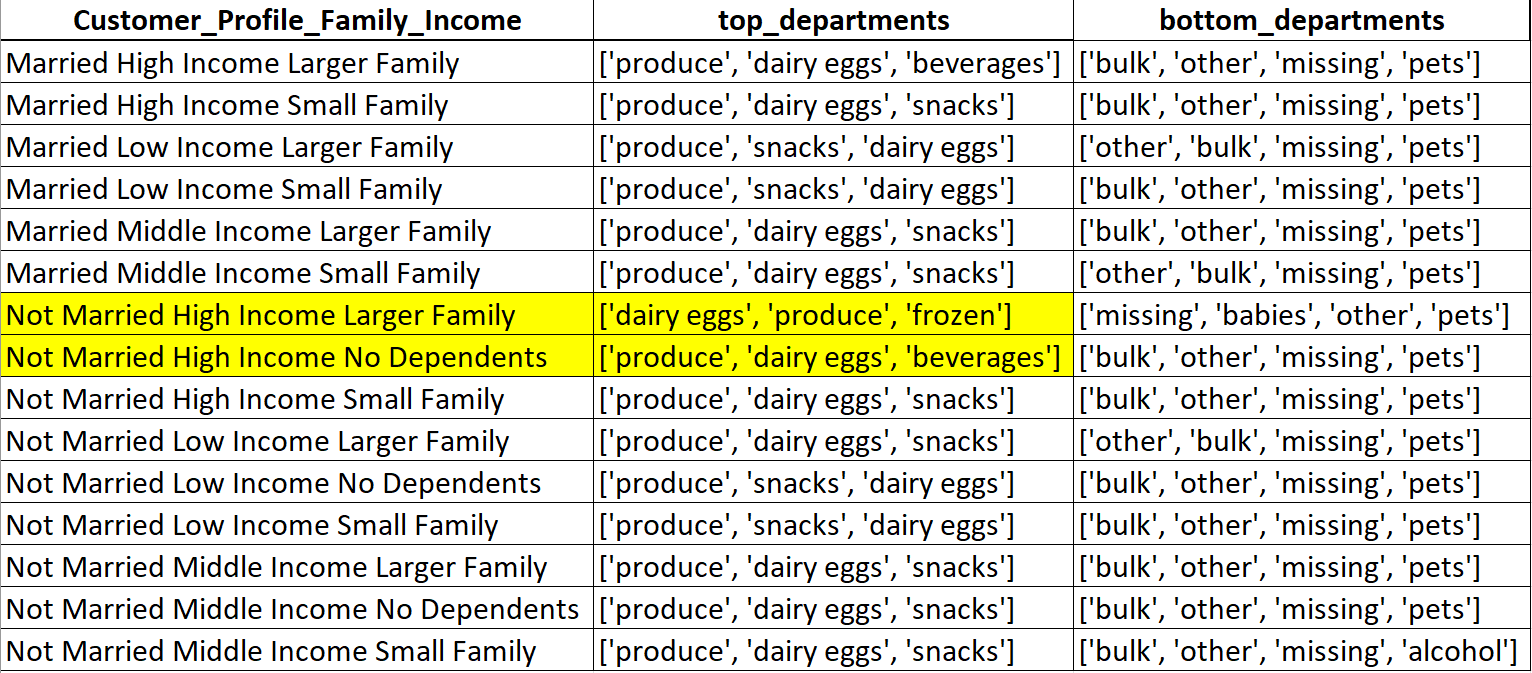

#### Are there certain types of products that are more popular than others? The marketing
#### The top three most popular departments by users when crossing profiles are: produce, dairy eggs and snacks
#### Except for 'Not Married High Income Larger Family' and 'Not Married High Income No Dependents' profile. The first one has 'beverages' in its top departments, the second one has 'frozen'. 

## 8.2. Regions by 'Customer_Profile_Family_Income' 

In [ ]:
# Create a crosstab to see the customers profiles distributed by regions

crosstab_region_profile = pd.crosstab(instacart_merged['region'], instacart_merged['Customer_Profile_Family_Income'], dropna = False)


In [ ]:
#Check results

crosstab_region_profile

In [ ]:
# Display the first few rows where 'region' is NaN

nan_regions = instacart_merged.loc[instacart_merged['region'].isna()].head()


In [ ]:
# Check the NaN values

nan_regions

In [ ]:
# Fill 'region' column with 'South' where 'state' is 'District of Columbia'

instacart_merged.loc[instacart_merged['state'] == 'District of Columbia', 'region'] = 'South'


#### Note: At this point I noted that 'District of Columbia' had been stayed out of the region counts. (i.e. for each entry of it in state, the entries in 'region' were NaN, I checked and confirmed it.)

#### I address this issue filling the state 'District of Columbia' with the expected value in its 'region', that is, 'South'.


## 9. Produce suitable charts to illustrate your results and export them in your project folder.

## 9.1 Profile: Family Status and Income distributed by Region level

In [ ]:
#Check results

crosstab_region_profile

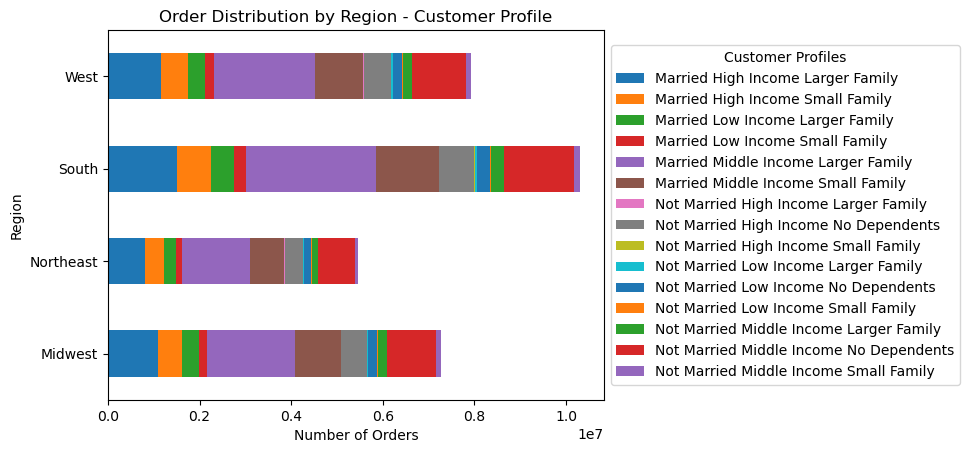

In [182]:
# Create a clustered bar chart by region using the crosstab_region_profile from above

bar_customer_profile_region = crosstab_region_profile.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart

bar_customer_profile_region.set(xlabel='Number of Orders', ylabel='Region', title='Order Distribution by Region - Customer Profile')
bar_customer_profile_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

### In general, married people (in the 'first blue to brown on chart) are the ones who contribute the most to Instacarts orders.

### Overview customers divided by two main-groups: Married and Not-Married People by Region

### Married customers contribute the most, and south region ranks in first in the both profiles categories

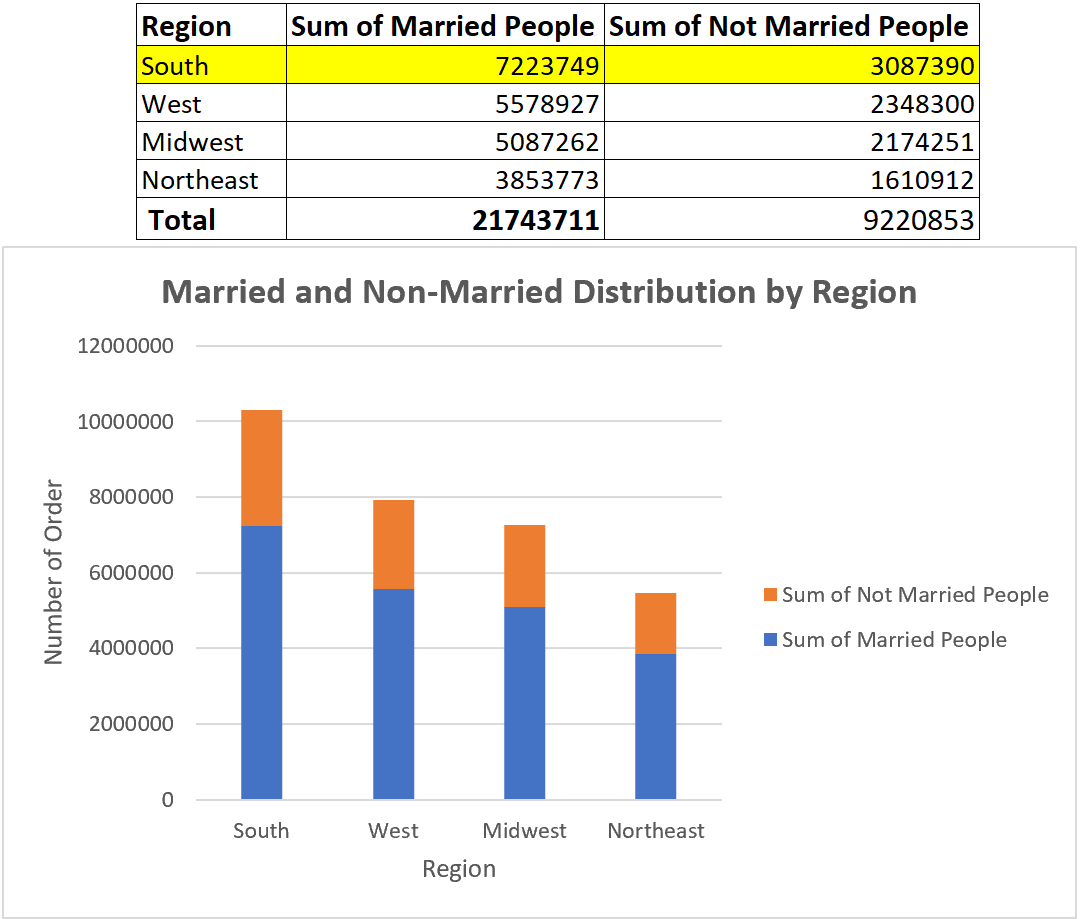

In [190]:
crosstab_region_profile.to_clipboard()

In [ ]:
# Export the bar chart to my visualization folder

bar_customer_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10' 'bar_customer_profile_region.png'), bbox_inches = 'tight')

## 9.2 Profile: Family Status and Income distributed by Department level

In [ ]:
# Create a crosstab to see the customers profiles distributed by regions

crosstab_department_profile = pd.crosstab(instacart_merged['department'], instacart_merged['Customer_Profile_Family_Income'], dropna = False)


In [ ]:
# Check the crosstab results

crosstab_department_profile

In [186]:
# Sorting the previously created crosstab
# Calculate the sum of orders for each department and sort

sorted_crosstab = crosstab_department_profile.sum(axis=1).sort_values(ascending=True)

# Use the sorted index to reorder the original DataFrame

sorted_crosstab_department_profile = crosstab_department_profile.loc[sorted_crosstab.index]

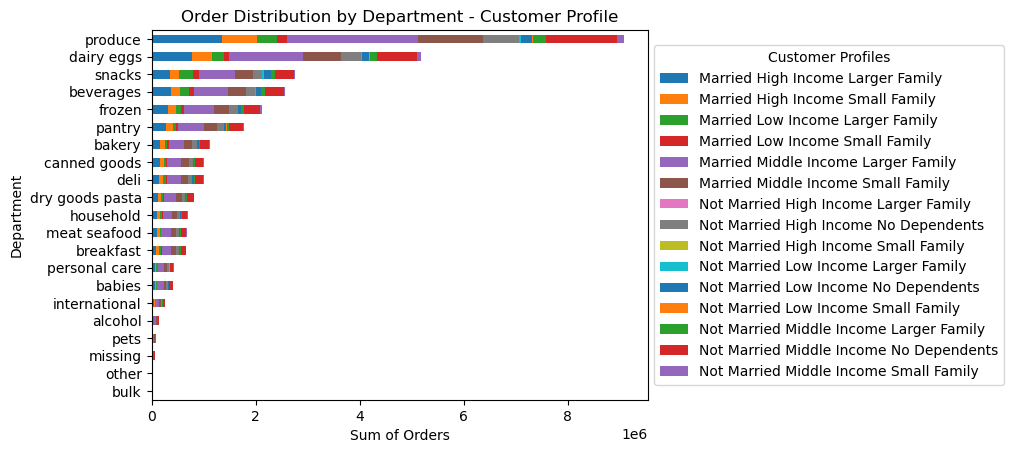

In [187]:
# Create a bar chart by department using the 'sorted_crosstab_department_profile' from above

bar_department_customer_profile = sorted_crosstab_department_profile.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart

bar_department_customer_profile.set(xlabel='Sum of Orders', ylabel='Department', title='Order Distribution by Department - Customer Profile')
bar_department_customer_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

### Given, that most customers of Instcart are in some 'Married Category', however, on this chart we can observe one single 'Not Married Category' standing out, namely 'Not Married Middle Income No Dependents' (the second red color)
### This profile is the only one of 'Not Married' which can be seen in almost every department in the graph.

In [188]:
# Export the bar chart to my visualization folder

bar_department_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10' 'bar_customer_profile_department.png'), bbox_inches = 'tight')

## 9.3 Profile: Age-Group Income distributed by frequency of orders

In [196]:
# Create a crosstab to see the Customer_Profile_Age-Group_Income' profiles among the frequency they order

crosstab_frequency_label_age_profile = pd.crosstab(instacart_merged['frequency_flag'], instacart_merged['Customer_Profile_Age-Group_Income'], dropna = False)

In [197]:
crosstab_frequency_label_age_profile

Customer_Profile_Age-Group_Income,Middle-Aged Adults High Income,Middle-Aged Adults Low Income,Middle-Aged Adults Middle Income,Older Adults High Income,Older Adults Low Income,Older Adults Middle Income,Young Adults High Income,Young Adults Low Income,Young Adults Middle Income
frequency_flag,,,,,,,,,
Frequent customer,1587244,718730,4348304,4674191,839483,4718828,54808,640869,3622019
Non-frequent customer,209961,130148,565829,620894,137176,642709,4944,108814,474500
Regular customer,507088,278379,1367142,1506188,279530,1528500,14195,229425,1154666


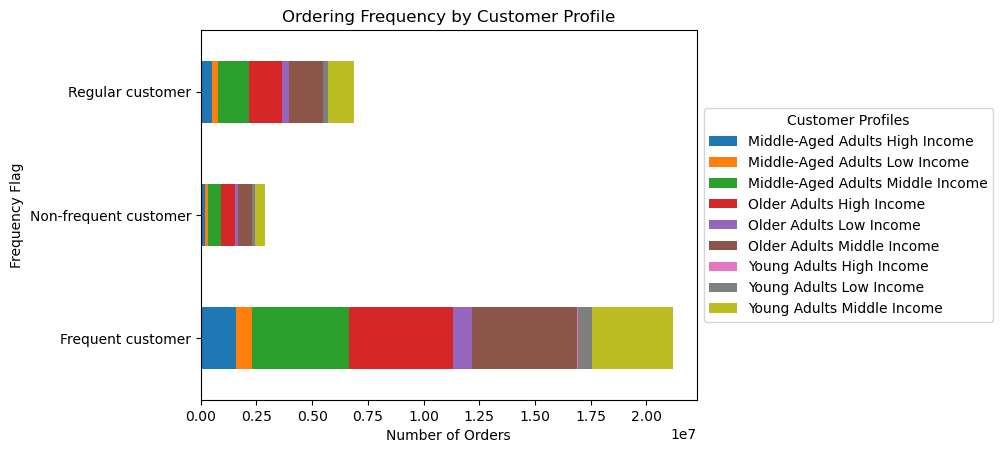

In [208]:
# Create a bar chart for 'frequency_flag' using the 'crosstab_frequency_label_age_profile' from above
barh_frequency_label_age_profile = crosstab_frequency_label_age_profile.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart
barh_frequency_label_age_profile.set(xlabel='Number of Orders', ylabel='Frequency Flag', title='Ordering Frequency by Customer Profile')
barh_frequency_label_age_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

### Most frequent customers ordering on Instacart's app are Older and Middle-Aged Adults, with High and Middle Income level.

### Young Adults are the less frequent customers ordering by Instacart, the single customer profile standing out here is 'Young Adults Middle Income'

In [209]:
# Export the bar chart of Customer Profile - Frequency of Orders to my visualization folder

barh_frequency_label_age_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_frequency_age_profile.png'), bbox_inches = 'tight')

## 9.4 Profile: Age-Group Income distributed by price average - ordered products

In [210]:
# Create a crosstab to see the the price range of Age-Group Income Profiles

crosstab_price_range_age_profile = pd.crosstab(instacart_merged['price_range_loc'], instacart_merged['Customer_Profile_Age-Group_Income'], dropna = False)

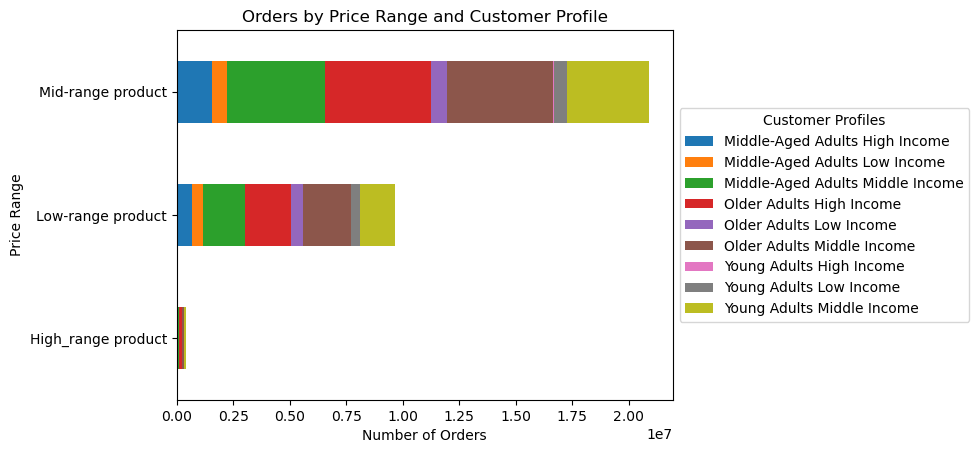

In [211]:
# Create a bar chart for Age-Group-Income profile by Price Range using the 'crosstab_price_range_age_profile' from above

bar_price_range_age_profile = crosstab_price_range_age_profile.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart
bar_price_range_age_profile.set(xlabel='Number of Orders', ylabel='Price Range', title='Orders by Price Range and Customer Profile')
bar_price_range_age_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')



#### Most products ordered on Instacart's app fall into 'Mid-range product' prices, products in 'High_range product' have a extremely low performance.

#### Highlighting the following Customer Profiles:
#### Older Adults with High Income
#### Older Adults with Middle Income
#### Middle-Aged Adults with Middle Income
#### Young Adults with Middle Income 

#### They contribute the most in the 'Mid-range product' price range as well as in the 'Low-range product' (second most popular price range) by Instacarts' customers.

In [212]:
# Export the bar chart of Customer Profile - Frequency of Orders to my visualization folder

bar_price_range_age_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_price_range_age_profile.png'), bbox_inches = 'tight')

## 9.5 Profile: Family Size-Status and Income distributed by price average - ordered products

In [214]:
# Create a crosstab to see the the price range of Age-Group Income Profiles

crosstab_price_range_fam_profile = pd.crosstab(instacart_merged['price_range_loc'], instacart_merged['Customer_Profile_Family_Income'], dropna = False)

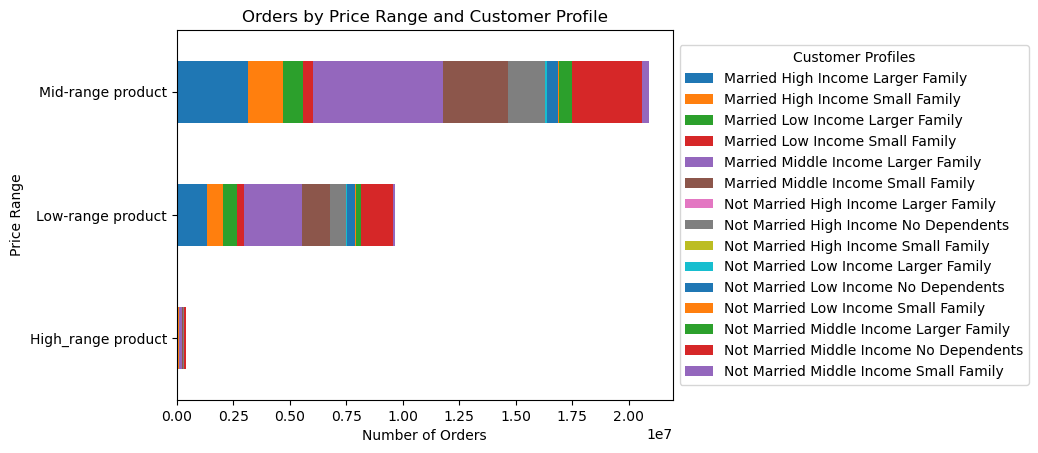

In [215]:
# Create a bar chart for Family Status-Income profile by Price Range using the 'crosstab_price_range_fam_profile' from above

bar_price_range_family_profile = crosstab_price_range_fam_profile.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart
bar_price_range_family_profile.set(xlabel='Number of Orders', ylabel='Price Range', title='Orders by Price Range and Customer Profile')
bar_price_range_family_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

#### Most products ordered on Instacart's app fall into 'Mid-range product' prices as well when we are looking at 'Family Size/Status - Income Profiles'

#### Highlighting the following Customer Profiles:
#### Married High Income Larger Family 
#### Married Middle Income Larger Family
#### Married Middle Income Small Family
#### Not Married Middle Income No Dependents
#### They contribute the most in the 'Mid-range product' price range as well as in the 'Low-range product' (second most popular price range) by Instacarts' customers.

In [216]:
# Export the bar chart of Customer Profile - Frequency of Orders to my visualization folder

bar_price_range_family_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_price_range_family_profile.png'), bbox_inches = 'tight')

## 9.5 Profile: Family Size-Status and Income  by max amount of orders

In [217]:
# Create a crosstab to see the the price range of Age-Group Income Profiles

crosstab_loyalty_flag_fam_profile = pd.crosstab(instacart_merged['loyalty_flag'], instacart_merged['Customer_Profile_Family_Income'], dropna = False)

In [222]:
crosstab_loyalty_flag_fam_profile.to_clipboard()

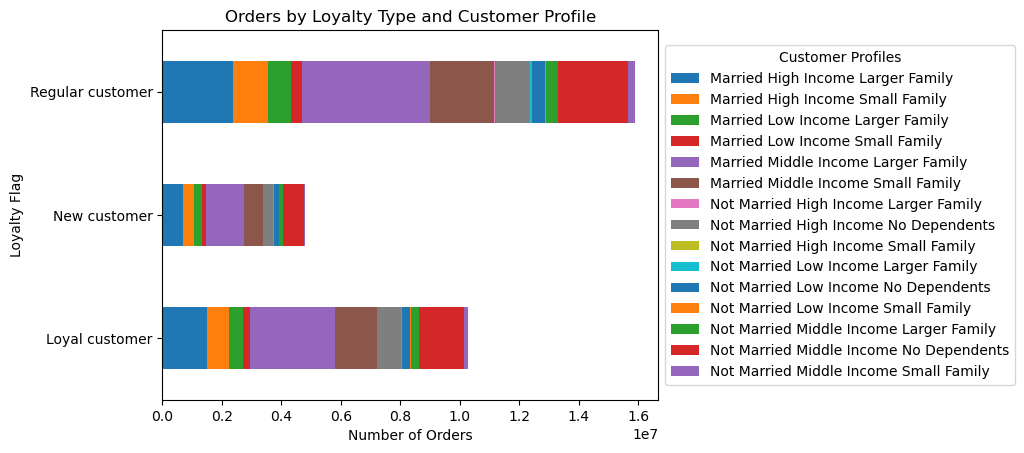

In [218]:
# Create a bar chart for Family Status-Income profile by max amount of using the 'crosstab_loyalty_flag_fam_profile' from above

bar_crosstab_loyalty_flag_fam_profile = crosstab_loyalty_flag_fam_profile.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart
bar_crosstab_loyalty_flag_fam_profile.set(xlabel='Number of Orders', ylabel='Loyalty Flag', title='Orders by Loyalty Type and Customer Profile')
bar_crosstab_loyalty_flag_fam_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

####  The most loyal customers( 'Loyal Customer' and 'Regular Customer')  combined share the same Customer Profiles:

#### Married High Income Larger Family 
#### Married Middle Income Larger Family
#### Married Middle Income Small Family
#### Not Married Middle Income No Dependents

#### The highlighted profiles are also the same found and the previous chart:  '9.5 Profile: Family Size-Status and Income distributed by price average - ordered products'

In [219]:
# Export the bar chart of Customer Profile - Loyalty Flag by max amount of orders to visualization folder

bar_crosstab_loyalty_flag_fam_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_loyalty_flag_fam_profile.png'), bbox_inches = 'tight')

#### overview Loyalty Flag divided by two main groups: Married and Not-Married customers

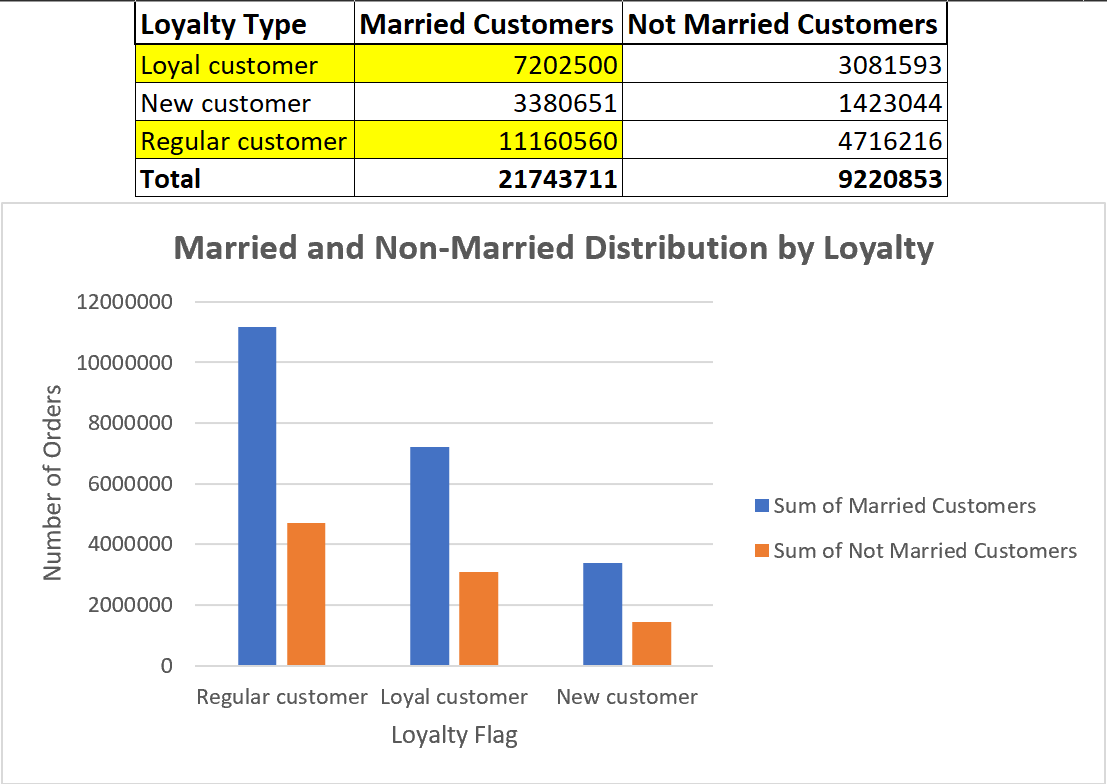

## 9.5 Profile: Family Size-Status and Income  by amount orders in the 'busiest_days'

#### Overview of the busiest days for Instacarts orders

#### On the weekend are the busiest days overall

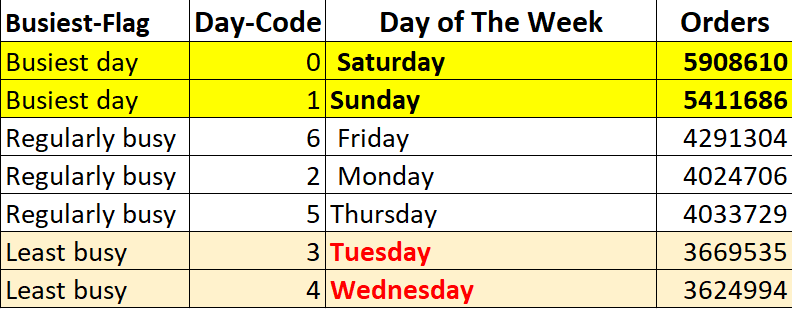

In [5]:
# Create a crosstab to see the the price range of Age-Group Income Profiles

crosstab_busiest_day = pd.crosstab(instacart_merged['busiest_days'] , instacart_merged['Customer_Profile_Family_Income'], dropna = False)

In [225]:
crosstab_busiest_day.to_clipboard()

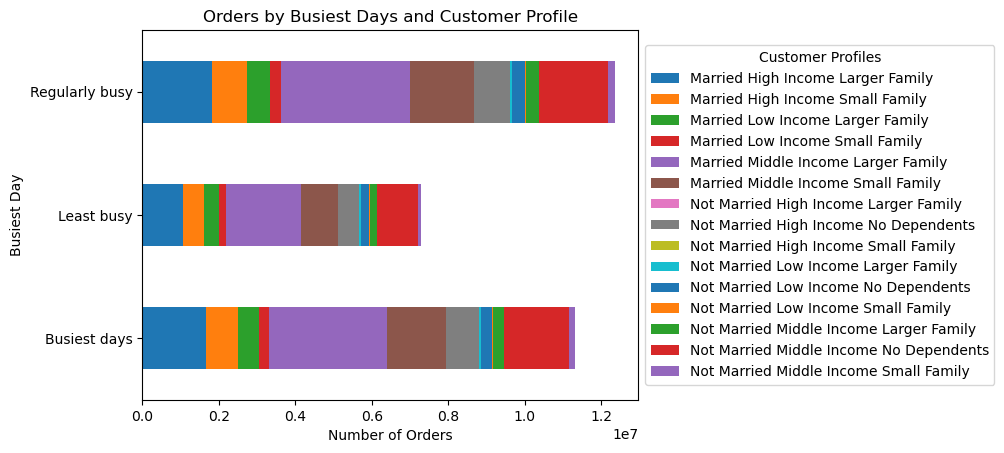

In [6]:
# Create a bar chart for Family Status-Income profile by 'orders busiest day'  'crosstab_busiest_day' from above

bar_crosstab_busiest_day = crosstab_busiest_day.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart
bar_crosstab_busiest_day.set(xlabel='Number of Orders', ylabel='Busiest Day', title='Orders by Busiest Days and Customer Profile')
bar_crosstab_busiest_day.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

### The customers profiles distributed by the 'Busiest Day' flag are quite the same, they do not exhibit great changes among the different days of the week.

In [7]:
# Export the bar chart of Customer Profile - Loyalty Flag by max amount of orders to visualization folder

bar_crosstab_busiest_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_busiest_day_family_profile.png'), bbox_inches = 'tight')

## 9.6. Top Customer Profiles

In [8]:
# Define the profiles that more often appear among all previously charts

selected_profiles = ['Married High Income Larger Family','Married Middle Income Larger Family',
                     'Married Middle Income Small Family','Not Married High Income No Dependents',
                    'Not Married Middle Income No Dependents']

In [9]:
# Filter the DataFrame with the 'selected_profiles' from above

filtered_profiles = instacart_merged.loc[instacart_merged['Customer_Profile_Family_Income'].isin(selected_profiles)]


In [10]:
# Create the crosstab that includes only the filtered customers profiles distributed along the besiest periods of the day

crosstab_busiest_period_of_day = pd.crosstab(instacart_merged['busiest_period_of_day'], filtered_profiles['Customer_Profile_Family_Income'], dropna=False)


In [12]:
crosstab_busiest_period_of_day

Customer_Profile_Family_Income,Married High Income Larger Family,Married Middle Income Larger Family,Married Middle Income Small Family,Not Married High Income No Dependents,Not Married Middle Income No Dependents
busiest_period_of_day,,,,,
Average orders,2626831,4820866,2386733,1335705,2625799
Fewest orders,51685,96965,50538,27657,52470
Most orders,1901749,3495526,1758185,958144,1892986


In [16]:
crosstab_busiest_period_of_day.to_clipboard() 

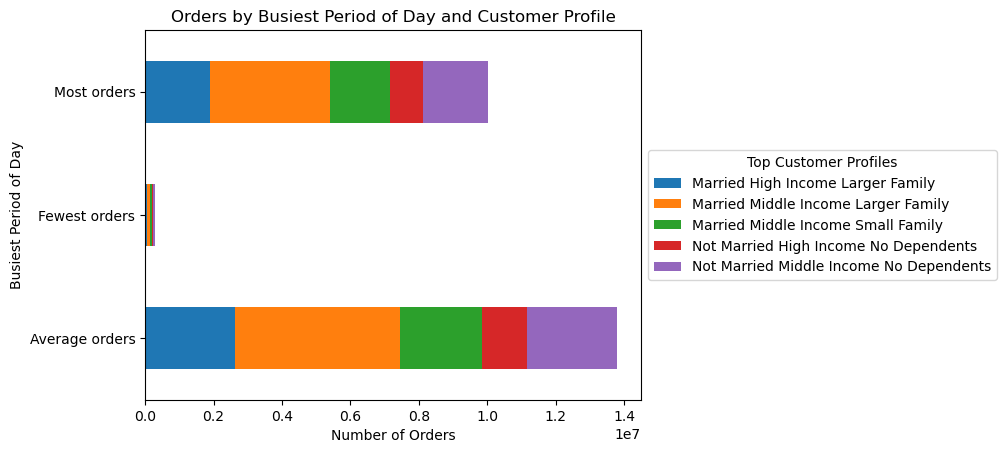

In [11]:
# Create a clustered bar chart for with the crosstab from above,
## 'Top Customers Profiles' matching its busiest periods of day for orders


bar_busiest_period_of_day = crosstab_busiest_period_of_day.plot.barh(stacked=True)

# Set labels and a title
# Put title legend next to chart
bar_busiest_period_of_day.set(xlabel='Number of Orders', ylabel='Busiest Period of Day', title='Orders by Busiest Period of Day and Customer Profile')
bar_busiest_period_of_day.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Top Customer Profiles')

#### Top Customer Profiles order most in the 'Average busy hours of day'

#### Upon reviewing all the previous analyses and charts, it is evident that the following profiles are most prevalent, thereby indicating a significant contribution to Instacart's revenue and special attention on which time of the day they order. 

#### Top Customer Profiles Identified:

#### Married High Income Larger Family
#### Married Middle Income Larger Family
#### Married Middle Income Small Family
#### Not Married High Income No Dependents
#### Not Married Middle Income No Dependents


In [17]:
# Export the bar chart of Top Customers Profiles' to visualization folder

bar_busiest_period_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'busiest_period_of_day_top_customers.png'), bbox_inches = 'tight')

Overview of orders made from the 'Top Customers Profiles' distributed among the periods of the day.

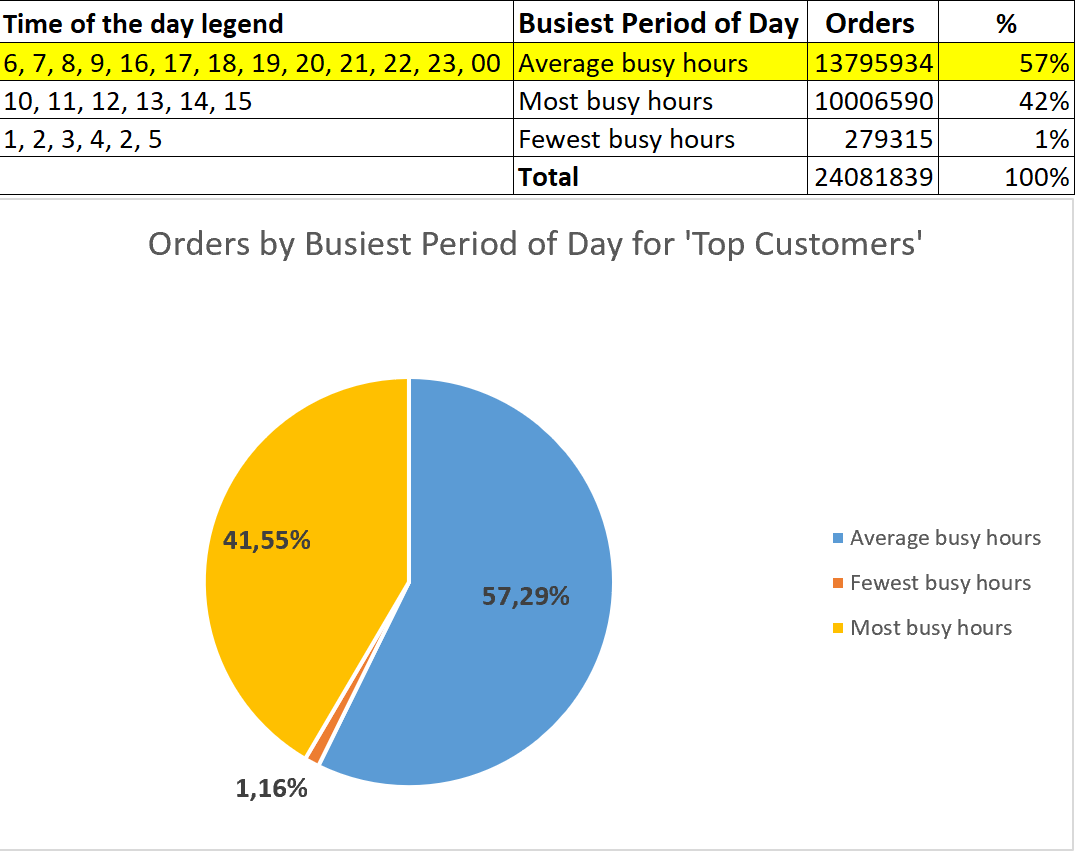

## 10. Tidy up your script, export your final data set, and save your notebook.

In [228]:
# Check the shape

instacart_merged.shape

(30964564, 35)

In [230]:
# Check Head

instacart_merged.head()

,product_id,product_name,aisle_id,department_id,department,prices,price_average,price_range_loc,spending_flag,order_id,user_id,order_number,max_order,loyalty_flag,orders_day_of_week,busiest_days,order_hour_of_day,busiest_period_of_day,days_since_prior_order,days_since_prior_order_median,frequency_flag,add_to_cart_order,reordered,gender,state,region,age,age_group,family_status,income,income_range,number_of_dependents,family_type,Customer_Profile_Family_Income,Customer_Profile_Age-Group_Income
0,1,Chocolate Sandwich Cookies,61,19,snacks,5.8,6.935811,Mid-range product,Low spender,3139998,138,28,32,Regular customer,6,Regularly busy,11,Most orders,3.0,8.0,Frequent customer,5,0,Male,Minnesota,Midwest,81,Older Adults,married,49620,Low Income,1,Small Family,Married Low Income Small Family,Older Adults Low Income
1,1,Chocolate Sandwich Cookies,61,19,snacks,5.8,6.935811,Mid-range product,Low spender,1977647,138,30,32,Regular customer,6,Regularly busy,17,Average orders,20.0,8.0,Frequent customer,1,1,Male,Minnesota,Midwest,81,Older Adults,married,49620,Low Income,1,Small Family,Married Low Income Small Family,Older Adults Low Income
2,4913,Table Water Crackers,78,19,snacks,4.4,6.935811,Low-range product,Low spender,894221,138,23,32,Regular customer,5,Regularly busy,13,Most orders,24.0,8.0,Frequent customer,3,0,Male,Minnesota,Midwest,81,Older Adults,married,49620,Low Income,1,Small Family,Married Low Income Small Family,Older Adults Low Income
3,11759,Organic Simply Naked Pita Chips,107,19,snacks,4.4,6.935811,Low-range product,Low spender,1986630,138,7,32,Regular customer,0,Busiest days,12,Average orders,7.0,8.0,Frequent customer,2,0,Male,Minnesota,Midwest,81,Older Adults,married,49620,Low Income,1,Small Family,Married Low Income Small Family,Older Adults Low Income
4,13424,Almonds,45,19,snacks,4.2,6.935811,Low-range product,Low spender,3139998,138,28,32,Regular customer,6,Regularly busy,11,Most orders,3.0,8.0,Frequent customer,4,0,Male,Minnesota,Midwest,81,Older Adults,married,49620,Low Income,1,Small Family,Married Low Income Small Family,Older Adults Low Income


In [231]:
# Exporting the final version of the data set

instacart_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_instacart_final.pkl'))

[Text(0, 0, 'Average orders'),
 Text(1, 0, 'Most orders'),
 Text(2, 0, 'Fewest orders')]

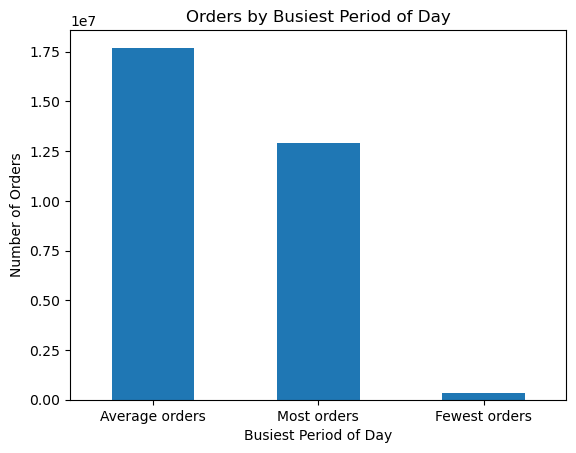

In [20]:
# Creating a Bar Chart

bar_busiests_period = instacart_merged['busiest_period_of_day'].value_counts().plot.bar()

# Set labels and a title
# Put title legend next to chart
bar_busiests_period.set(xlabel='Busiest Period of Day', ylabel='Number of Orders', title='Orders by Busiest Period of Day')

# rotate x-axis labels

bar_busiests_period.set_xticklabels(bar_busiests_period.get_xticklabels(), rotation=0)

In [21]:
# Export the bar chart of busiests_period_of_day to visualization folder

bar_busiests_period.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_busiests_period.png'), bbox_inches = 'tight')